<a href="https://colab.research.google.com/github/markoraidlo/T14-Journey-to-zero/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UT-ML-T14 - Journey to zero - Predict electricity consumption

Marko Raidlo

##Kaggle setup

In [1]:
# Kaggle setuo
from google.colab import files

files.upload(); # upload kaggle.json file

Saving kaggle.json to kaggle.json


In [2]:
import json

# Use kaggle.json file
!mkdir /root/.kaggle/
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [3]:
# Download competition data
!kaggle competitions download -c 'predict-electricity-consumption' -w

401 - Unauthorized


In [4]:
# Unzip competition data
!unzip predict-electricity-consumption.zip

unzip:  cannot find or open predict-electricity-consumption.zip, predict-electricity-consumption.zip.zip or predict-electricity-consumption.zip.ZIP.


In [ ]:
# Submit the sample_submission
!kaggle competitions submit -c predict-electricity-consumption -f sample_submission.csv -m "Sample submission"

100% 5.24k/5.24k [00:00<00:00, 12.7kB/s]
400 - Bad Request


In [6]:
# Colabi jaoks vajalikud impordid
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")

Mounted at /content/drive


##Data explorataion

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import pickle

In [10]:
train =  pd.read_csv('predict-electricity-consumption/train.csv')
train.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,consumption
0,2021-09-01 00:00:00+03:00,11.2,10.3,94.0,NaN,NaN,320.0,7.2,16.7,1012.6,2.0,0.09016,0.577
1,2021-09-01 01:00:00+03:00,10.7,9.6,93.0,NaN,NaN,320.0,7.2,13.0,1012.6,2.0,0.09251,0.594
2,2021-09-01 02:00:00+03:00,9.9,9.0,94.0,NaN,NaN,320.0,7.2,13.0,1012.2,2.0,0.08890,0.685
3,2021-09-01 03:00:00+03:00,10.0,8.4,90.0,NaN,NaN,330.0,7.2,13.0,1011.9,1.0,0.08735,1.016
4,2021-09-01 04:00:00+03:00,9.0,8.1,94.0,NaN,NaN,300.0,3.6,13.0,1011.4,2.0,0.08688,0.677


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8592 entries, 0 to 8591
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8592 non-null   object 
 1   temp         8592 non-null   float64
 2   dwpt         8592 non-null   float64
 3   rhum         8592 non-null   float64
 4   prcp         2159 non-null   float64
 5   snow         119 non-null    float64
 6   wdir         8592 non-null   float64
 7   wspd         8592 non-null   float64
 8   wpgt         8592 non-null   float64
 9   pres         8592 non-null   float64
 10  coco         8396 non-null   float64
 11  el_price     8592 non-null   float64
 12  consumption  8590 non-null   float64
dtypes: float64(12), object(1)
memory usage: 872.8+ KB


In [ ]:
train.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,consumption
count,8592.000000,8592.000000,8592.000000,2159.000000,119.000000,8592.000000,8592.000000,8592.000000,8592.000000,8396.000000,8592.000000,8590.000000
mean,6.744204,2.486767,77.013617,0.056647,78.319328,201.564246,9.156355,20.869681,1013.229423,4.902930,0.160844,1.046364
std,9.257806,8.184391,17.520566,0.384586,63.129130,87.792064,4.826976,9.956558,12.592944,4.958744,0.120034,1.095114
min,-26.100000,-28.700000,20.000000,0.000000,0.000000,0.000000,0.000000,2.900000,962.600000,1.000000,0.000070,0.000000
25%,0.400000,-2.900000,66.000000,0.000000,20.000000,150.000000,7.200000,13.000000,1006.500000,2.000000,0.092820,0.363000
50%,6.200000,1.900000,83.000000,0.000000,60.000000,210.000000,7.200000,18.500000,1014.700000,3.000000,0.136440,0.811000
75%,13.225000,9.000000,91.000000,0.000000,130.000000,270.000000,10.800000,27.800000,1020.700000,5.000000,0.199845,1.366000
max,31.400000,20.900000,100.000000,7.900000,220.000000,360.000000,31.700000,63.000000,1047.500000,25.000000,4.000000,10.381000


###12 variables:

time - definition of example_id

temp - Air Temperature (°C)

dwpt - The dew point in °C

rhum - The relative humidity in percent (%)

prcp - The one hour precipitation total in mm

snow - The snow depth in mm

wdir - The wind direction in degrees (°)

wspd - The average wind speed in km/h

wpgt - The peak wind gust in km/h

pres - The sea-level air pressure in hPa

coco - The weather condition code

el_price - the electricity price in Estonia on that hour (€/kWh)

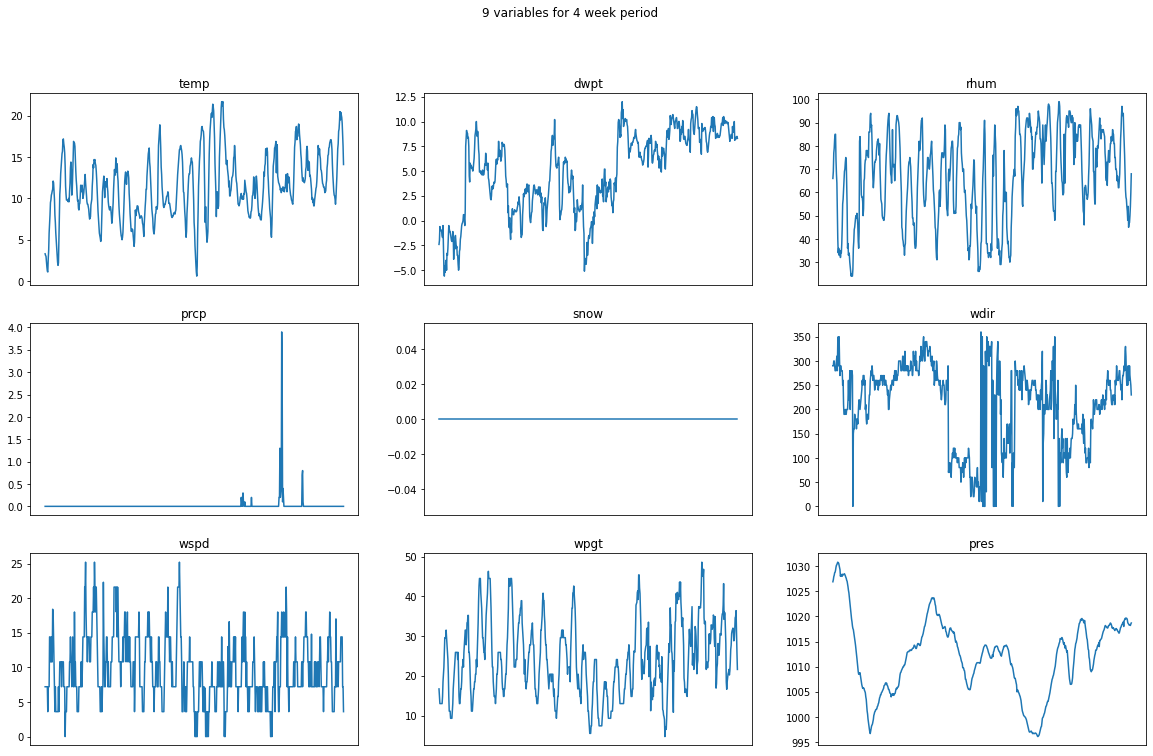

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

fig.suptitle("9 variables for 4 week period")

variables = ['temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'el_price']
k = 0
time = 6000
step = 24 * 7 * 4

for i in range(3):
  for j in range(3):
    axes[i, j].plot(train.time[time:time+step], train[variables[k]][time:time+step].fillna(0))
    axes[i, j].axes.get_xaxis().set_visible(False)
    axes[i, j].set_title(variables[k])

    k += 1

#plt.savefig('vars.png')

In [ ]:
train.coco.value_counts()

1.0     1815
2.0     1716
4.0     1467
3.0     1120
14.0     767
7.0      623
5.0      232
17.0     179
18.0     113
21.0     104
8.0       94
12.0      48
15.0      38
10.0      18
9.0       17
25.0      15
19.0      13
22.0      10
13.0       2
6.0        2
16.0       1
20.0       1
23.0       1
Name: coco, dtype: int64

Weather codes (https://dev.meteostat.net/formats.html#weather-condition-codes)

1	Clear

2	Fair

4	Overcast

3	Cloudy

14 Light Snowfall

7	Light Rain

5	Fog

...

###Predict:  Consumption

consumption - the electricity consumption (kWh)

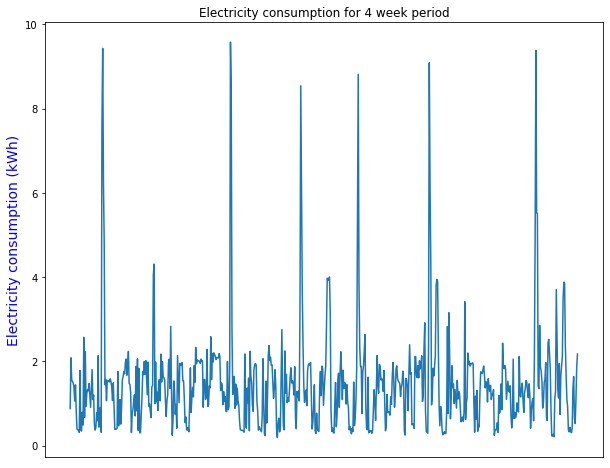

In [23]:
time = 2097
time = 3000
step = 168*4

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Electricity consumption for 4 week period')
#ax.plot(train.time[time:time+72], train.el_price[time:time+72], label='1', color='r')
#ax.set_xlabel("Time", fontsize = 14)
#ax.set_ylabel("Electricity price (€/kWh)", color="red",fontsize=14)
# Fix time x-axis labels

#ax2=ax.twinx()
ax.plot(train.time[time:time+step], train.consumption[time:time+step])
ax.set_ylabel("Electricity consumption (kWh)",color="blue",fontsize=14)
ax.axes.get_xaxis().set_visible(False)

plt.savefig('cons1.png')
plt.show()

###Correletions between features

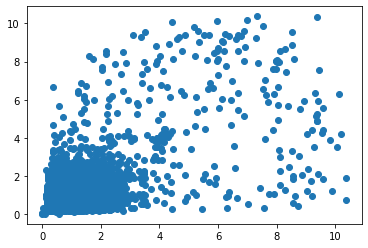

In [ ]:
# x-axis consumption, y-axis consumption +1 hour
plt.scatter(train.consumption, train.consumption.shift(1, fill_value=0))

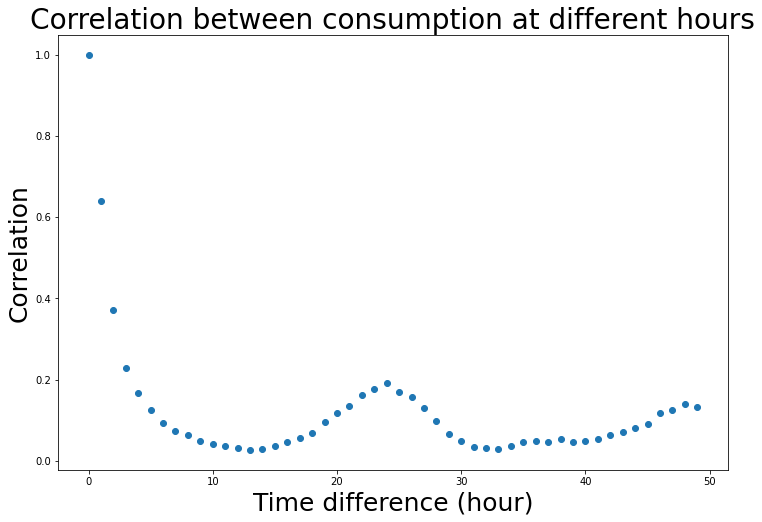

In [ ]:
# Autocorrelation between consumption
# Note high correlation for previous few hours, plus 24 hours.
plt.figure(figsize=(12,8))
plt.title("Correlation between consumption at different hours", fontsize=28)

plt.xlabel("Time difference (hour)", fontsize=25)
plt.ylabel("Correlation", fontsize=25)

autokor = pd.DataFrame([train.consumption.autocorr(n) for n in range(50)])
plt.scatter(range(50), autokor)

plt.savefig('correlation.png')
plt.show()

In [ ]:
train.consumption.rolling(24*7).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
8587    0.677429
8588    0.663506
8589    0.662119
8590    0.667065
8591    0.669780
Name: consumption, Length: 8592, dtype: float64

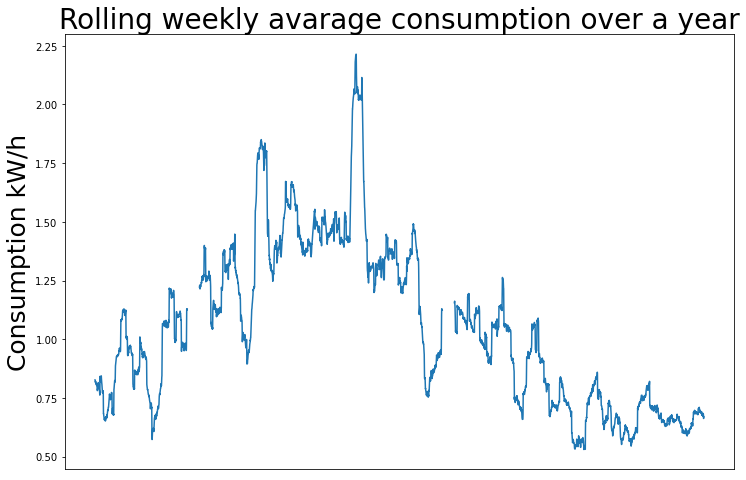

In [ ]:
# Avarages over a week
# Winter has higher consumption
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Rolling weekly avarage consumption over a year", fontsize=28)

plt.ylabel("Consumption kW/h", fontsize=25)
ax.axes.get_xaxis().set_visible(False)

autokor = pd.DataFrame([train.consumption.autocorr(n) for n in range(50)])
plt.plot(train.time, train.consumption.rolling(24*7).mean())


plt.savefig('avarage.png')
plt.show()

In [ ]:
for var in variables:
  print('Covariance for {}'.format(var))
  print(np.corrcoef(train[var].fillna(0), train.consumption.fillna(0)))

Covariance for temp
[[ 1.         -0.26771055]
 [-0.26771055  1.        ]]
Covariance for dwpt
[[ 1.         -0.25027943]
 [-0.25027943  1.        ]]
Covariance for rhum
[[1.         0.09445692]
 [0.09445692 1.        ]]
Covariance for prcp
[[ 1.         -0.02817902]
 [-0.02817902  1.        ]]
Covariance for snow
[[ 1.         -0.00253587]
 [-0.00253587  1.        ]]
Covariance for wdir
[[ 1.         -0.00514315]
 [-0.00514315  1.        ]]
Covariance for wspd
[[1.         0.04867243]
 [0.04867243 1.        ]]
Covariance for wpgt
[[1.        0.0720092]
 [0.0720092 1.       ]]
Covariance for pres
[[ 1.         -0.06901375]
 [-0.06901375  1.        ]]
Covariance for el_price
[[ 1.         -0.12457042]
 [-0.12457042  1.        ]]


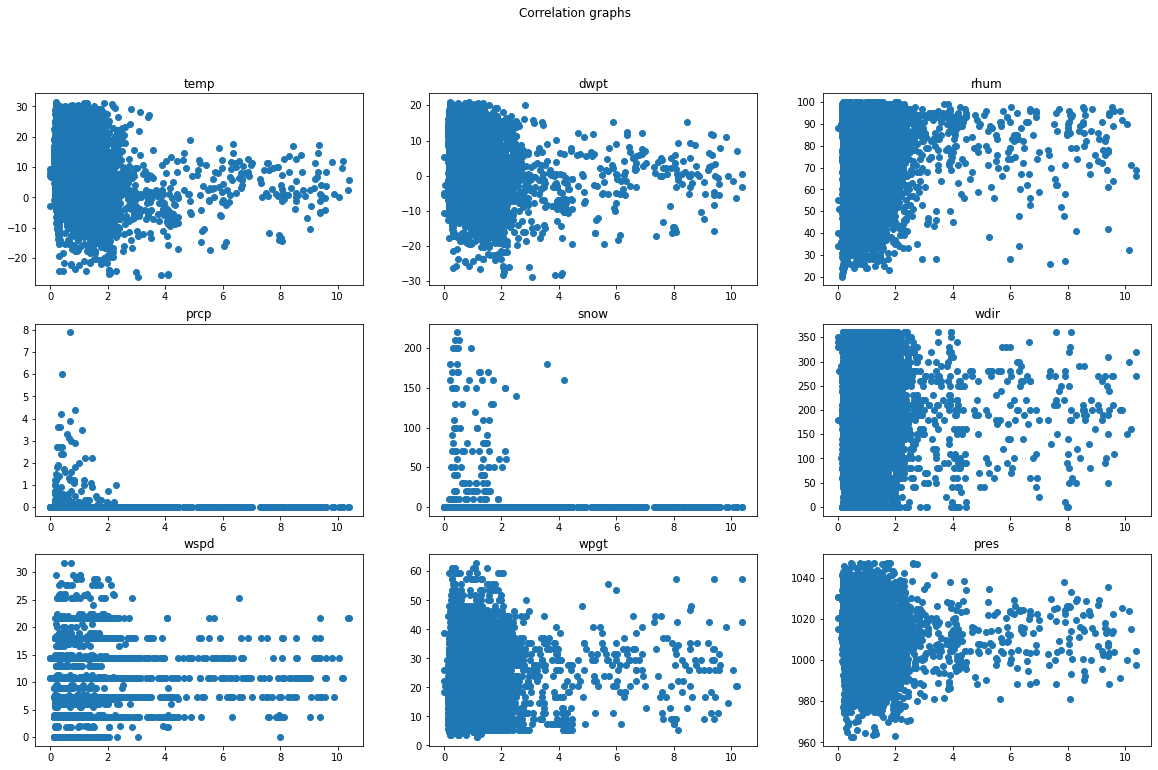

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

fig.suptitle("Correlation graphs")


k = 0

for i in range(3):
  for j in range(3):
    #axes[i, j].scatter(train[variables[k]].fillna(0), train.consumption.fillna(0))
    axes[i, j].scatter(train.consumption.fillna(0), train[variables[k]].fillna(0))
    axes[i, j].set_title(variables[k])

    k += 1

Text(0.5, 1.0, 'el_price')

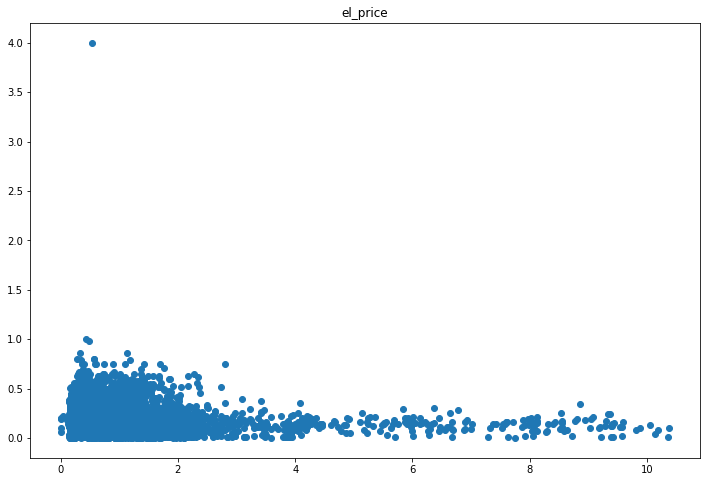

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8))

k = -1
axes.scatter(train.consumption.fillna(0), train[variables[k]].fillna(0))
axes.set_title(variables[k])


##Data preprocessing

In [ ]:
from sklearn import preprocessing
import pandas as pd

def preprocess(trainDF, testDF, previous_hours=None):
  """ Take train and test datasets at the same time
  """

  # Remove row if consumption is NaN
  # (Only for training data)
  trainDF = trainDF.dropna(subset=['consumption'])

  
  # scaler for consumption
  normScaler = preprocessing.StandardScaler()
  normScaler.fit(trainDF())
  trainDF['consumption'] = normScaler.transform(trainDF['consumption'])

  # Add n previous hour features
  if previous_hours:
    for i in range(1, previous_hours+1):
      trainDF['{}cons'.format(i)] = trainDF.consumption.shift(i)
    
    # Cut out first n rows with NaNs
    trainDF = trainDF[previous_hours:]

  # All remaning NaNs replaced with 0
  trainDF = trainDF.fillna(0)
  testDF = testDF.fillna(0)

  # Get weekday, month and hour of day
  trainDF['time'] = pd.to_datetime(trainDF.time, utc=True)
  trainDF['time'] = trainDF['time'].dt.tz_convert('Europe/Tallinn')
  trainDF['day'] = trainDF['time'].dt.weekday
  trainDF['month'] = trainDF['time'].dt.month
  trainDF['hour'] = trainDF['time'].dt.hour

  testDF['time'] = pd.to_datetime(testDF.time, utc=True)
  testDF['time'] = testDF['time'].dt.tz_convert('Europe/Tallinn')
  testDF['day'] = testDF['time'].dt.weekday
  testDF['month'] = testDF['time'].dt.month
  testDF['hour'] = testDF['time'].dt.hour

  # Normalization
  colList = ['temp', 'dwpt','rhum', 'wdir', 'wspd', 'wpgt', 'pres', 'el_price']

  for col in colList:
    scaler = preprocessing.MinMaxScaler()
    normCol = scaler.fit_transform(trainDF[[col]])
    trainDF[col] = normCol
    testDF[col] = scaler.transform(testDF[[col]])

  # One hot encoding days
  onehot_days = pd.get_dummies(trainDF['day'])
  onehot_days = onehot_days.set_axis(['Monday', 'Tuesday', 'Wendesday', 
                                      'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1)
  trainDF = trainDF.join(onehot_days)

  onehot_days = pd.get_dummies(testDF['day'])
  onehot_days = onehot_days.set_axis(['Monday', 'Tuesday', 'Wendesday', 
                                      'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1)
  testDF = testDF.join(onehot_days)
  
  # One hot encoding days
  onehot_hours = pd.get_dummies(trainDF['hour'])
  hour_cols = ["{}hour".format(i) for i in range(24)]
  onehot_hours = onehot_hours.set_axis(hour_cols, axis=1)
  trainDF = trainDF.join(onehot_hours)

  onehot_hours = pd.get_dummies(testDF['hour'])
  onehot_hours = onehot_hours.set_axis(hour_cols, axis=1)
  testDF = testDF.join(onehot_hours)


  #TODO: Onehot months
  #TODO: Onehot coco

  # If one-hot vecencodingtor is done remove:
  scaler = preprocessing.MinMaxScaler()
  normCol = scaler.fit_transform(trainDF[['month']])
  trainDF['month'] = normCol
  testDF['month'] = scaler.transform(testDF[['month']])

  # Sin and cos of hours and days
  trainDF['sin_hour'] = np.sin(2*np.pi*(trainDF['hour'])/24)
  trainDF['cos_hour'] = np.cos(2*np.pi*(trainDF['hour'])/24)   
  trainDF['sin_day'] = np.sin(2*np.pi*(trainDF['day'])/7)
  trainDF['cos_day'] = np.cos(2*np.pi*(trainDF['day'])/7) 

  testDF['sin_hour'] = np.sin(2*np.pi*(testDF['hour'])/24)
  testDF['cos_hour'] = np.cos(2*np.pi*(testDF['hour'])/24)   
  testDF['sin_day'] = np.sin(2*np.pi*(testDF['day'])/7)
  testDF['cos_day'] = np.cos(2*np.pi*(testDF['day'])/7) 


  trainDF = trainDF.drop(columns=['day', 'hour', 'coco'])
  testDF = testDF.drop(columns=['day', 'hour', 'coco'])
  # And add:
  #processedDataFrame = dataFrame.drop(columns=['day', 'month', 'hour']

  return trainDF, testDF, normScaler


# sin / cos hours
# normalize constants
# Same normalizer for train and test

#f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(df[col_name]-start_num)/period),
#f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(df[col_name]-start_num)/period)

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")

Mounted at /content/drive


In [ ]:
#or
from google.colab import files

files.upload();

In [ ]:
from preprocessing_pipeline import preprocess

In [ ]:
processed_train = preprocess(train, 24)
print(processed_train.columns)

Index(['time', 'temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'el_price', 'consumption', '1cons', '2cons', '3cons', '4cons',
       '5cons', '6cons', '7cons', '8cons', '9cons', '10cons', '11cons',
       '12cons', '13cons', '14cons', '15cons', '16cons', '17cons', '18cons',
       '19cons', '20cons', '21cons', '22cons', '23cons', '24cons', 'month',
       'Monday', 'Tuesday', 'Wendesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', '0hour', '1hour', '2hour', '3hour', '4hour', '5hour', '6hour',
       '7hour', '8hour', '9hour', '10hour', '11hour', '12hour', '13hour',
       '14hour', '15hour', '16hour', '17hour', '18hour', '19hour', '20hour',
       '21hour', '22hour', '23hour'],
      dtype='object')


/content/drive/My Drive/Colab Notebooks/preprocessing_pipeline.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['{}cons'.format(i)] = dataFrame.consumption.shift(i)


In [ ]:
test =  pd.read_csv('test.csv')
processed_test = preprocess(test)
processed_test

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,...,14hour,15hour,16hour,17hour,18hour,19hour,20hour,21hour,22hour,23hour
0,2022-08-25 00:00:00+03:00,0.593607,0.723404,0.575342,0.0,0.0,0.944444,0.346154,0.136691,0.909091,...,0,0,0,0,0,0,0,0,0,0
1,2022-08-25 01:00:00+03:00,0.547945,0.716312,0.630137,0.0,0.0,0.083333,0.230769,0.334532,0.909091,...,0,0,0,0,0,0,0,0,0,0
2,2022-08-25 02:00:00+03:00,0.547945,0.716312,0.630137,0.0,0.0,0.888889,0.269231,0.269784,0.909091,...,0,0,0,0,0,0,0,0,0,0
3,2022-08-25 03:00:00+03:00,0.484018,0.851064,0.863014,0.0,0.0,0.000000,0.153846,0.201439,0.939394,...,0,0,0,0,0,0,0,0,0,0
4,2022-08-25 04:00:00+03:00,0.456621,0.858156,0.917808,0.0,0.0,0.777778,0.269231,0.201439,0.909091,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2022-08-31 19:00:00+03:00,0.136986,0.070922,0.602740,0.0,0.0,0.888889,0.730769,0.866906,0.454545,...,0,0,0,0,0,1,0,0,0,0
164,2022-08-31 20:00:00+03:00,0.136986,0.014184,0.547945,0.0,0.0,0.861111,0.576923,0.669065,0.454545,...,0,0,0,0,0,0,1,0,0,0
165,2022-08-31 21:00:00+03:00,0.091324,0.092199,0.684932,0.0,0.0,0.805556,0.423077,0.600719,0.522727,...,0,0,0,0,0,0,0,1,0,0
166,2022-08-31 22:00:00+03:00,0.045662,0.007092,0.671233,0.0,0.0,0.861111,0.576923,0.467626,0.454545,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
processed_train = preprocess(train)

processed_train

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,consumption,day,month,hour
0,2021-09-01 00:00:00+03:00,0.648696,0.786290,0.9250,0.0,0.0,0.888889,0.227129,0.229617,0.588928,2.0,0.022523,0.577,0.333333,0.727273,0.000000
1,2021-09-01 01:00:00+03:00,0.640000,0.772177,0.9125,0.0,0.0,0.888889,0.227129,0.168053,0.588928,2.0,0.023110,0.594,0.333333,0.727273,0.043478
2,2021-09-01 02:00:00+03:00,0.626087,0.760081,0.9250,0.0,0.0,0.888889,0.227129,0.168053,0.584217,2.0,0.022208,0.685,0.333333,0.727273,0.086957
3,2021-09-01 03:00:00+03:00,0.627826,0.747984,0.8750,0.0,0.0,0.916667,0.227129,0.168053,0.580683,1.0,0.021820,1.016,0.333333,0.727273,0.130435
4,2021-09-01 04:00:00+03:00,0.610435,0.741935,0.9250,0.0,0.0,0.833333,0.113565,0.168053,0.574794,2.0,0.021703,0.677,0.333333,0.727273,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,2022-08-24 19:00:00+03:00,0.925217,0.921371,0.4250,0.0,0.0,0.500000,0.126183,0.136439,0.676090,2.0,0.133720,0.678,0.333333,0.636364,0.826087
8588,2022-08-24 20:00:00+03:00,0.890435,0.923387,0.5125,0.0,0.0,0.611111,0.189274,0.136439,0.687868,1.0,0.124960,0.457,0.333333,0.636364,0.869565
8589,2022-08-24 21:00:00+03:00,0.886957,0.943548,0.5750,0.0,0.0,0.416667,0.126183,0.106489,0.686690,4.0,0.107857,0.500,0.333333,0.636364,0.913043
8590,2022-08-24 22:00:00+03:00,0.838261,0.921371,0.6625,0.0,0.0,0.444444,0.189274,0.106489,0.687868,2.0,0.137992,2.321,0.333333,0.636364,0.956522


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
score = []
# Teha test ümber, et test töötaks samamoodi nagu kaggle test
# Predict on 1 week of data
for hours in range(1, 48):
  processed_train = preprocess(train)
  X = pd.DataFrame()
  for i in range(1, hours+1):
    X['{}cons'.format(i)] = processed_train.consumption.shift(i)

  #processed_train = processed_train[hours:]
  X = X[hours:]
  #X = processed_train[['1cons', '2cons', '3cons', '4cons', '5cons', '6cons', '7cons',
  ##                  '8cons', '9cons', '10cons', '11cons', '12cons', '13cons', '14cons',
  #                  '15cons', '16cons', '17cons', '18cons', '19cons', '20cons', '21cons',
  #                   '22cons', '23cons', '24cons']]
  y = processed_train[['consumption']][hours:].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.95, shuffle =False)

  neural_net = MLPRegressor(max_iter=1000000,
                         solver = 'adam',
                         activation = 'relu').fit(X_train, y_train.ravel())

  test_pred = neural_net.predict(X_test)  

  mse = mean_squared_error(y_test, test_pred, squared = True)
  print("{} hours: {}".format(hours, mse))

  score.append(mse)

1 hours: 0.28135660682364383
2 hours: 0.2720462253370569
3 hours: 0.2588623108828223
4 hours: 0.2471890468411634
5 hours: 0.2546728988028745
6 hours: 0.26029552617118623
7 hours: 0.26884993658079814
8 hours: 0.2774595682448251
9 hours: 0.28413018660386435
10 hours: 0.2885505160319489
11 hours: 0.28963758149128266
12 hours: 0.2901087683876584
13 hours: 0.29845741876678017
14 hours: 0.31760323986291805
15 hours: 0.2980853641364212
16 hours: 0.33209182669666876
17 hours: 0.3040856281743345
18 hours: 0.3137715761198162
19 hours: 0.30793480657924255
20 hours: 0.31195578511971017
21 hours: 0.3050108246143473
22 hours: 0.3296039090618595
23 hours: 0.3262998757304732
24 hours: 0.2958951877090329
25 hours: 0.33963217157870107
26 hours: 0.33967479163186454
27 hours: 0.34755186126082993
28 hours: 0.3310492651007643
29 hours: 0.31862620852675655
30 hours: 0.36037489033284237
31 hours: 0.3618727089145591
32 hours: 0.3776664646198779
33 hours: 0.36829990215950975
34 hours: 0.3458068891129205
35 hour

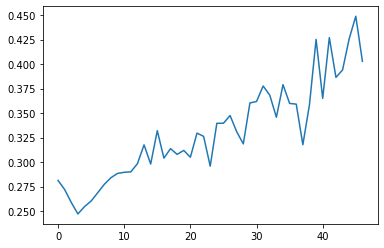

In [ ]:
plt.plot(score)

##Simple models

In [ ]:
processed_train.columns

Index(['time', 'temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'wpgt', 'pres',
       'el_price', 'consumption', 'day', 'month', 'hour'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split


X = processed_train[['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'wpgt', 'pres', 
                    'el_price', 'day', 'month', 'hour']]
y = processed_train['consumption']

# To shuffle or not?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=111, shuffle=True)

In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# LinearRegression
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_error = mean_squared_error(y_test, lr_predictions, squared = True)
print("LinearRegression: {}".format(lr_error))

# Ridge
reg = linear_model.Ridge()
reg.fit(X_train, y_train)
reg_prediction = reg.predict(X_test)
reg_error = mean_squared_error(y_test, reg_prediction, squared = True)
print("Ridge: {}".format(reg_error))

# Lasso
las = reg = linear_model.Lasso()
las.fit(X_train, y_train)
las_predictions = las.predict(X_test)
las_error = mean_squared_error(y_test, las_predictions, squared = True)
print("Lasso: {}".format(las_error))

# BayesianRidge
bay = linear_model.BayesianRidge()
bay.fit(X_train, y_train)
bay_predictions = bay.predict(X_test)
bay_error = mean_squared_error(y_test, bay_predictions, squared = True)
print("BayesianRidge: {}".format(bay_error))

# KNeighboursRegressor()
knn  = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_error = mean_squared_error(y_test, knn_predictions, squared = True)
print("KNeighboursRegressor: {}".format(knn_error))

# DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 100)
dtr.fit(X_train, y_train)
dtr_predictions = dtr.predict(X_test)
dtr_error = mean_squared_error(y_test, dtr_predictions, squared = True)
print("DecisionTreeRegressor: {}".format(dtr_error))

LinearRegression: 1.094854331946907
Ridge: 1.0938765918005007
Lasso: 1.2275677513681067
BayesianRidge: 1.0938584428899323
KNeighboursRegressor: 0.9224289444703144
DecisionTreeRegressor: 1.8324765867287545


##Submitting predictions to kaggle

In [ ]:
test =  pd.read_csv('test.csv')
processed_test = preprocess(test)
processed_test

,time,temp,dwpt,rhum,wdir,wspd,wpgt,pres,el_price,day,month,hour
0,2022-08-25 00:00:00+03:00,0.593607,0.723404,0.575342,0.944444,0.346154,0.136691,0.909091,0.313208,0.500000,0.0,0.000000
1,2022-08-25 01:00:00+03:00,0.547945,0.716312,0.630137,0.083333,0.230769,0.334532,0.909091,0.237031,0.500000,0.0,0.043478
2,2022-08-25 02:00:00+03:00,0.547945,0.716312,0.630137,0.888889,0.269231,0.269784,0.909091,0.228973,0.500000,0.0,0.086957
3,2022-08-25 03:00:00+03:00,0.484018,0.851064,0.863014,0.000000,0.153846,0.201439,0.939394,0.242768,0.500000,0.0,0.130435
4,2022-08-25 04:00:00+03:00,0.456621,0.858156,0.917808,0.777778,0.269231,0.201439,0.909091,0.258468,0.500000,0.0,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...
163,2022-08-31 19:00:00+03:00,0.136986,0.070922,0.602740,0.888889,0.730769,0.866906,0.454545,0.423407,0.333333,0.0,0.826087
164,2022-08-31 20:00:00+03:00,0.136986,0.014184,0.547945,0.861111,0.576923,0.669065,0.454545,0.412814,0.333333,0.0,0.869565
165,2022-08-31 21:00:00+03:00,0.091324,0.092199,0.684932,0.805556,0.423077,0.600719,0.522727,0.334645,0.333333,0.0,0.913043
166,2022-08-31 22:00:00+03:00,0.045662,0.007092,0.671233,0.861111,0.576923,0.467626,0.454545,0.350433,0.333333,0.0,0.956522


In [ ]:
# Model where consumption is avarage over training set
base_line = train.consumption.mean()
submission = pd.DataFrame(
    {'time': processed_test.time, 'consumption': base_line},
    columns = ['time', 'consumption'])
submission.to_csv('submission_baseline.csv', index = False)

In [ ]:
# Submit submission
!kaggle competitions submit -c predict-electricity-consumption -f submission_baseline.csv -m "Consumption avarage"

100% 7.40k/7.40k [00:00<00:00, 17.2kB/s]
400 - Bad Request


In [ ]:
# Best model, train on entire training set and predict values
knn  = KNeighborsRegressor()
knn.fit(X, y)
knn_predictions = knn.predict(processed_test[['temp', 'dwpt', 'rhum', 'wdir', 
                                               'wspd', 'wpgt', 'pres', 
                                               'el_price', 'day', 'month', 'hour']])

In [ ]:
submission = pd.DataFrame(
    {'time': processed_test.time, 'consumption': knn_predictions},
    columns = ['time', 'consumption'])
submission.to_csv('knn_reg_submission.csv', index = False)

In [ ]:
!kaggle competitions submit -c predict-electricity-consumption -f knn_reg_submission.csv -m "KNeighborsRegressor default correct"

100% 6.01k/6.01k [00:00<00:00, 17.1kB/s]
400 - Bad Request


In [ ]:
X = processed_train[['temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'wpgt', 'pres', 
                    'el_price', 'day', 'month', 'hour']]
y = processed_train['consumption']

In [ ]:
import xgboost as xgb

#param_list = [("objective", "multi:softmax"), ("eval_metric", "merror"), ("num_class", 10)]
#early_stopping = 50
#eval_list = [(dtrain, 'train'), (dtest, 'eval')]

xgb_r = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 500, seed = 123)

xgb_r = xgb_r.fit(X, y)

pred = xgb_r.predict(processed_test[['temp', 'dwpt', 'rhum', 'wdir', 
                                               'wspd', 'wpgt', 'pres', 
                                               'el_price', 'day', 'month', 'hour']])

In [ ]:
submission = pd.DataFrame(
    {'time': processed_test.time, 'consumption': pred},
    columns = ['time', 'consumption'])
submission.to_csv('XGBRegressor_submission.csv', index = False)

In [ ]:
!kaggle competitions submit -c predict-electricity-consumption -f XGBRegressor_submission.csv -m "Default XGBRegressor n=500, full"

100% 5.92k/5.92k [00:00<00:00, 11.6kB/s]
Successfully submitted to Journey to zero - Predict electricity consumption